In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit
%matplotlib inline

In [2]:
### import data of simulation 1 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_1,m1_1,m2_1,x_1,y_1,z_1,vx_1,vy_1,vz_1,vr_1,vtheta_1,vphi_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
### import data of simulation 2 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_2,m1_2,m2_2,x_2,y_2,z_2,vx_2,vy_2,vz_2,vr_2,vtheta_2,vphi_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
### import data of simulation 1 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,m1_wo_1,m2_wo_1,x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1,vr_wo_1,vtheta_wo_1,vphi_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,9,10,29,30,31,32,33,34,35,36,37), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### import data of simulation 2 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,m1_wo_2,m2_wo_2,x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2,vr_wo_2,vtheta_wo_2,vphi_wo_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [6]:
### load radii, actions, half light and half mass radii for simulations ###
r3d_1,J_phi_1,J_theta_1,J_r_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH1.txt')
r3d_2,J_phi_2,J_theta_2,J_r_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH2.txt')
r3d_wo_1,J_phi_wo_1,J_theta_wo_1,J_r_wo_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH1.txt')
r3d_wo_2,J_phi_wo_2,J_theta_wo_2,J_r_wo_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH2.txt')
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2=np.loadtxt('half_mass_and_half_light_radius')

In [7]:
print(hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2)

4.13329 2.5014 2.08948 2.69536 7.8937 5.40817 6.7517 3.85325


In [8]:
print(np.sum(m1_1+m2_1),np.sum(m1_2+m2_2),np.sum(m1_wo_1+m2_wo_1),np.sum(m1_wo_2+m2_wo_2))

308533.169063 115149.567012 172671.281141 669844.310538


In [9]:
### initialize orbit class ###

bh_orbit_1=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m1_1[0]+m2_1[0])
bh_orbit_2=GCorbit(inputfilename='densityfile_IMBH2.txt',bhmass_M_sun=m1_2[0]+m2_2[0])
wobh_orbit_1=GCorbit(inputfilename='densityfile_noIMBH1.txt')
wobh_orbit_2=GCorbit(inputfilename='densityfile_noIMBH2.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [10]:
### loads guiding star radii for every star of both simulations ###
r_guide_bh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH1.txt',unpack='True')
r_guide_bh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH2.txt',unpack='True')
r_guide_wobh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH1.txt',unpack='True')
r_guide_wobh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH2.txt',unpack='True')


In [11]:
### sorts action arrays as guiding star radius array is sorted ###

#with IMBH 1
r_guide_bh_argsort_1=np.argsort(r_guide_bh_1)
r_guide_bh_sort_1=r_guide_bh_1[r_guide_bh_argsort_1]
J_r_bh_sort_1=J_r_1[r_guide_bh_argsort_1]
J_theta_bh_sort_1=J_theta_1[r_guide_bh_argsort_1]
J_phi_bh_sort_1=J_phi_1[r_guide_bh_argsort_1]

#with IMBH 2
r_guide_bh_argsort_2=np.argsort(r_guide_bh_2)
r_guide_bh_sort_2=r_guide_bh_2[r_guide_bh_argsort_2]
J_r_bh_sort_2=J_r_2[r_guide_bh_argsort_2]
J_theta_bh_sort_2=J_theta_2[r_guide_bh_argsort_2]
J_phi_bh_sort_2=J_phi_2[r_guide_bh_argsort_2]

#without IMBH 1
r_guide_wobh_argsort_1=np.argsort(r_guide_wobh_1)
r_guide_wobh_sort_1=r_guide_wobh_1[r_guide_wobh_argsort_1]
J_r_wobh_sort_1=J_r_wo_1[r_guide_wobh_argsort_1]
J_theta_wobh_sort_1=J_theta_wo_1[r_guide_wobh_argsort_1]
J_phi_wobh_sort_1=J_phi_wo_1[r_guide_wobh_argsort_1]

#without IMBH 2
r_guide_wobh_argsort_2=np.argsort(r_guide_wobh_2)
r_guide_wobh_sort_2=r_guide_wobh_2[r_guide_wobh_argsort_2]
J_r_wobh_sort_2=J_r_wo_2[r_guide_wobh_argsort_2]
J_theta_wobh_sort_2=J_theta_wo_2[r_guide_wobh_argsort_2]
J_phi_wobh_sort_2=J_phi_wo_2[r_guide_wobh_argsort_2]

In [12]:
### calculate mean values of actions and radii ###

#IMBH1
binning=1000
r_mean_1=np.zeros((len(J_r_bh_sort_1)/binning))
Jr_mean_1=np.zeros(int(len(J_r_bh_sort_1)/binning))
Jtheta_mean_1=np.zeros(int(len(J_r_bh_sort_1)/binning))
Jphi_mean_1=np.zeros(int(len(J_r_bh_sort_1)/binning))
for i in range(int(len(J_r_bh_sort_1)/binning)):
    Jr_mean_1[i]=np.mean(J_r_bh_sort_1[i*binning:(i+1)*binning])
    Jtheta_mean_1[i]=np.mean(J_theta_bh_sort_1[i*binning:(i+1)*binning])
    Jphi_mean_1[i]=np.mean(J_phi_bh_sort_1[i*binning:(i+1)*binning])
    r_mean_1[i]=np.mean(r_guide_bh_sort_1[i*binning:(i+1)*binning])

#IMBH2
r_mean_2=np.zeros((len(J_r_bh_sort_2)/binning))
Jr_mean_2=np.zeros(int(len(J_r_bh_sort_2)/binning))
Jtheta_mean_2=np.zeros(int(len(J_r_bh_sort_1)/binning))
Jphi_mean_1=np.zeros(int(len(J_r_bh_sort_1)/binning))
for i in range(int(len(J_r_bh_sort_1)/binning)):
    Jr_mean_1[i]=np.mean(J_r_bh_sort_1[i*binning:(i+1)*binning])
    Jtheta_mean_1[i]=np.mean(J_theta_bh_sort_1[i*binning:(i+1)*binning])
    Jphi_mean_1[i]=np.mean(J_phi_bh_sort_1[i*binning:(i+1)*binning])
    r_mean_1[i]=np.mean(r_guide_bh_sort_1[i*binning:(i+1)*binning])
    
#without bh
r_mean_wo_1=np.zeros((len(J_r_wobh_sort_1)/binning))
Jr_mean_wo_1=np.zeros(int(len(J_r_wobh_sort_1)/binning))
Jtheta_mean_wo_1=np.zeros(int(len(J_theta_wobh_sort_1)/binning))
Jphi_mean_wo_1=np.zeros(int(len(J_phi_wobh_sort_1)/binning))
for i in range(int(len(J_r_wobh_sort_1)/binning)):
    Jr_mean_wo_1[i]=np.mean(J_r_wobh_sort_1[i*binning:(i+1)*binning])
    Jtheta_mean_wo_1[i]=np.mean(J_theta_wobh_sort_1[i*binning:(i+1)*binning])
    Jphi_mean_wo_1[i]=np.mean(J_phi_wobh_sort_1[i*binning:(i+1)*binning])
    r_mean_wo_1[i]=np.mean(r_guide_wobh_sort_1[i*binning:(i+1)*binning])

### calculate guiding star radii over effective radii ###

r_bh_1=r_mean_1/hmr_bh_1
r_wo_bh_1=r_mean_wo_1/hmr_wo_bh_1

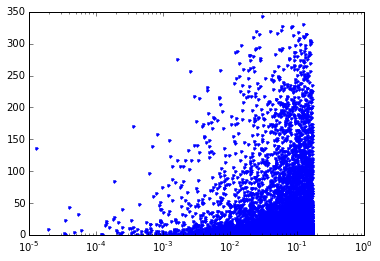

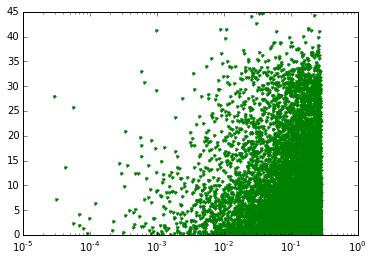

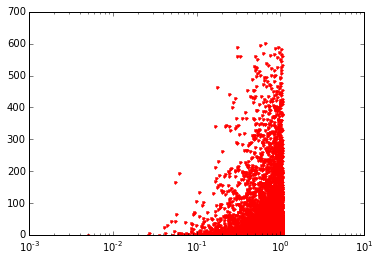

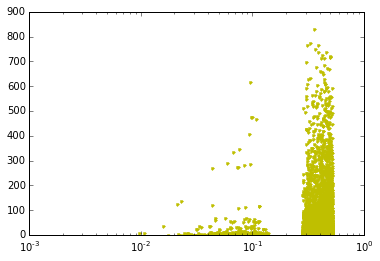

In [51]:
plt.semilogx(r_guide_bh_sort_1[0:10000],J_r_bh_sort_1[0:10000],'b.')
plt.show()
plt.semilogx(r_guide_bh_sort_2[0:10000],J_r_bh_sort_2[0:10000],'g.')
plt.show()
plt.semilogx(r_guide_wobh_sort_1[0:10000],J_r_wobh_sort_1[0:10000],'r.')
plt.show()
plt.semilogx(r_guide_wobh_sort_2[0:10000],J_r_wobh_sort_2[0:10000],'y.')


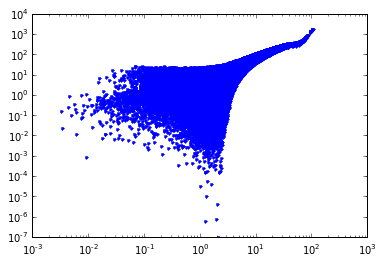

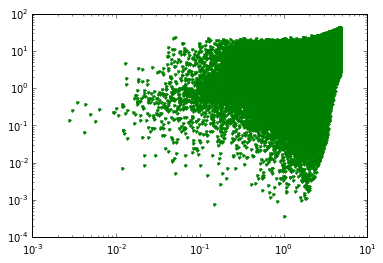

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0
/home/sophia/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:802: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


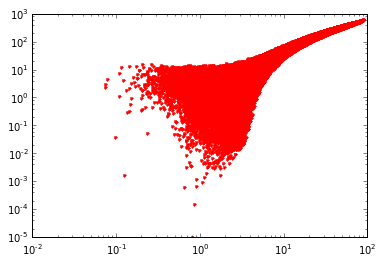

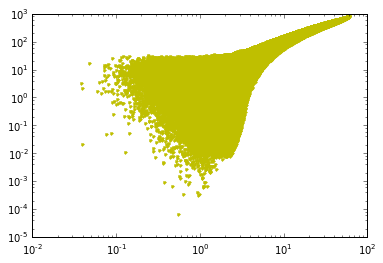

In [46]:
plt.loglog(r3d_1,J_r_1,'b.')
plt.show()
plt.loglog(r3d_2,J_r_2,'g.')
plt.show()
plt.loglog(r3d_wo_1,J_r_wo_1,'r.')
plt.show()
plt.loglog(r3d_wo_2,J_r_wo_2,'y.')


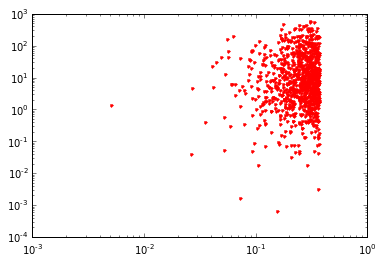

In [39]:
plt.loglog(r_guide_wobh_sort_1[0:1000],J_r_wobh_sort_1[0:1000],'r.')

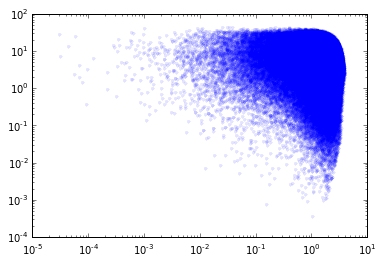

In [14]:
plt.loglog(r_guide_bh_sort_2,J_r_bh_sort_2,'b.',alpha=0.1)
#plt.axvline(0.25,color='r',alpha=0.1)
#plt.xlim(0.05,3)

In [15]:
blob_sort_1=r_guide_bh_1<=0.25
r3d_blobsort_1=r3d_1[blob_sort_1]
J_r_blobsort_1=J_r_1[blob_sort_1]


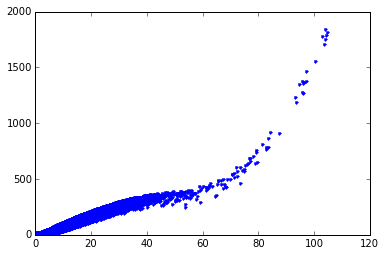

In [33]:
plt.plot(r3d_1,J_r_1,'b.')

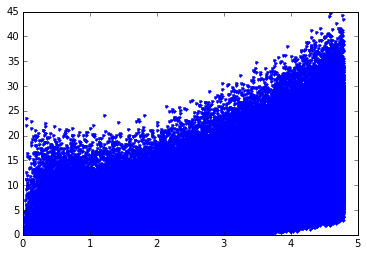

In [35]:
plt.plot(r3d_2,J_r_2,'b.')

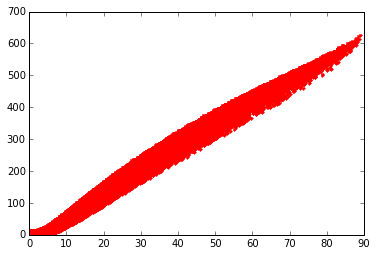

In [34]:
plt.plot(r_3d_wo_1,J_r_wo_1,'r.')

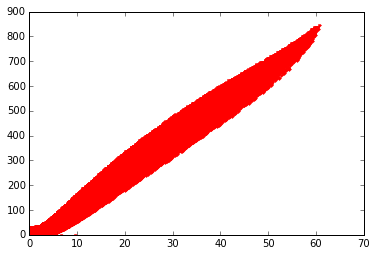

In [36]:
plt.plot(r_3d_wo_2,J_r_wo_2,'r.')

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0
/home/sophia/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:802: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


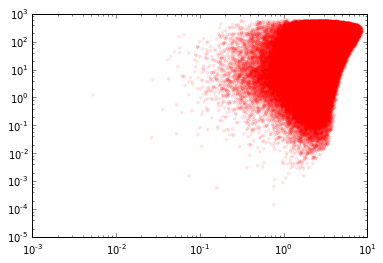

In [18]:
plt.loglog(r_guide_wobh_sort_1,J_r_wobh_sort_1,'r.',alpha=0.1)

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0
/home/sophia/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:802: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


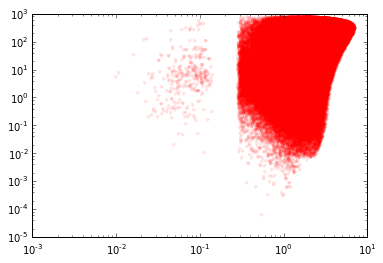

In [19]:
plt.loglog(r_guide_wobh_sort_2,J_r_wobh_sort_2,'r.',alpha=0.1)

In [20]:
blob_sort_wo_2=r_guide_wobh_2<=0.2
r3d_blobsort_wo_2=r3d_wo_2[blob_sort_wo_2]
J_r_blobsort_wo_2=J_r_wo_2[blob_sort_wo_2]
print(blob_sort_wo_2)

[False  True False ..., False False False]


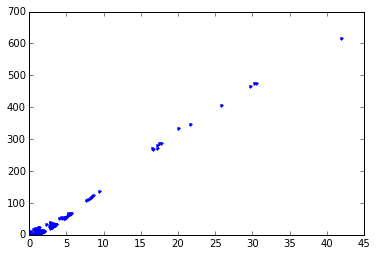

In [21]:
plt.plot(r3d_blobsort_wo_2,J_r_blobsort_wo_2,'.')

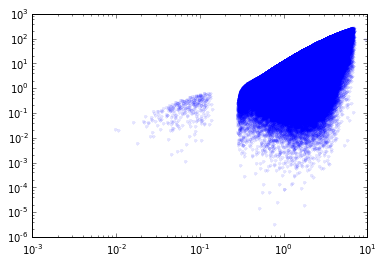

In [22]:
plt.loglog(r_guide_wobh_sort_2,J_theta_wobh_sort_2,'b.',alpha=0.1)


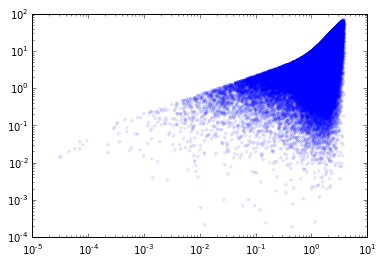

In [23]:
plt.loglog(r_guide_bh_sort_2,J_phi_bh_sort_2,'b.',alpha=0.1)


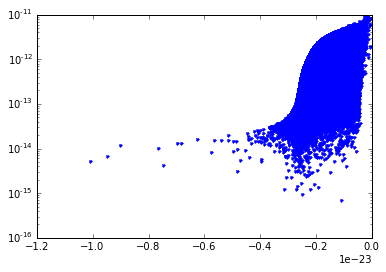

In [24]:
plt.semilogy(bh_orbit_1.energy(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:]),bh_orbit_1.angularmom(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])[0],'.')

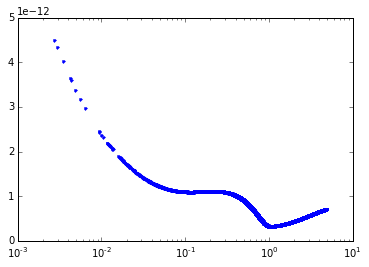

In [25]:
plt.semilogx(r_3d_2[1:],bh_orbit_2.v_circ(r_3d_2[1:]),'.')

In [26]:
### calculate anisitropy parameter and according distance ###

#with bh
bh_1=GCphasespace(r=r3d_1,bin_num=30)
r_beta_1=bh_1.mean_distance(r_guide_bh_sort_1) #use guiding star radius
beta_1=bh_1.anisotropy_param(vr_1,vtheta_1,vphi_1)

#w/o bh
wo_bh_1=GCphasespace(r=r3d_wo_1,bin_num=30)
r_beta_wo_1=wo_bh_1.mean_distance(r_guide_wobh_sort_1) #use guiding star radius
beta_wo_1=wo_bh_1.anisotropy_param(vr_wo_1,vtheta_wo_1,vphi_wo_1)

### calculate giuding star radii over effective radii ###

r_beta_bh_1=r_beta_1/hmr_bh_1
r_beta_wo_bh_1=r_beta_wo_1/hmr_wo_bh_1

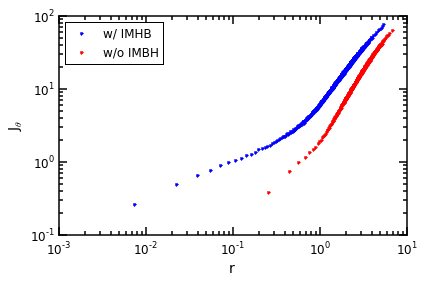

In [27]:
### plot J_theta over r without guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_mean_1,Jtheta_mean_1,'b.',label='w/ IMHB')
ax.loglog(r_mean_wo_1,Jtheta_mean_wo_1,'r.',label='w/o IMBH')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r',fontsize=14)
ax.set_ylabel('J$_\\theta$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

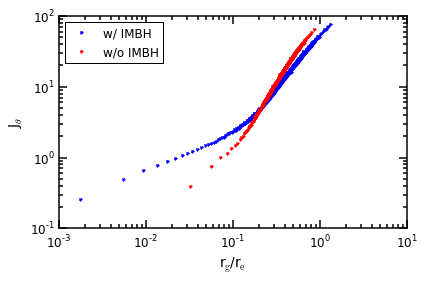

In [28]:
### plot J_theta over r with guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh_1,Jtheta_mean_1,'b.',label='w/ IMBH')
ax.loglog(r_wo_bh_1,Jtheta_mean_wo_1,'r.',label='w/o IMBH')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r$_\mathrm{g}$/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('J$_\\theta$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

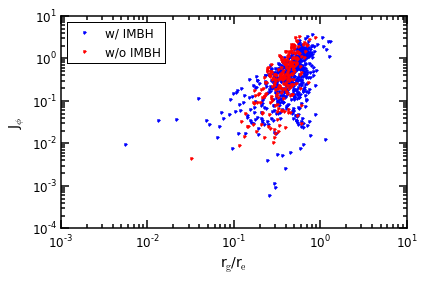

In [29]:
### plot J_phi over r with guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh_1,Jphi_mean_1,'b.',label='w/ IMBH')
ax.loglog(r_wo_bh_1,Jphi_mean_wo_1,'r.',label='w/o IMBH')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r$_\mathrm{g}$/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('J$_\phi$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


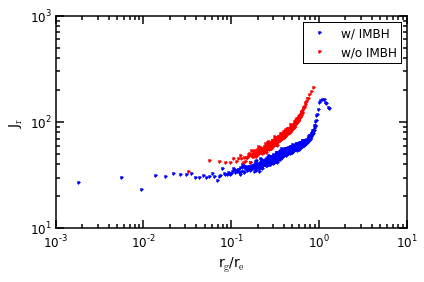

In [30]:
### plot J_r over r with guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh_1,Jr_mean_1,'b.',label='w/ IMBH')
ax.loglog(r_wo_bh_1,Jr_mean_wo_1,'r.',label='w/o IMBH')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r$_\mathrm{g}$/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

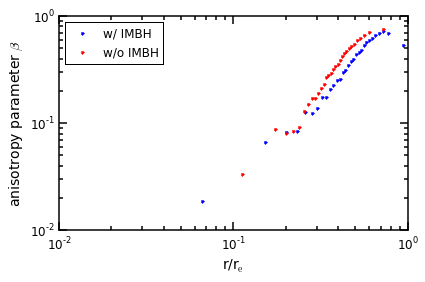

In [31]:
### plot beta over r with guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_beta_bh_1,beta_1,'b.',label='w/ IMBH')
ax.loglog(r_beta_wo_bh_1,beta_wo_1,'r.',label='w/o IMBH')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('anisotropy parameter $\\beta$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

In [32]:
### plot J_theta over r with guiding star radius ###
#L_bh=np.zeros(len(r_3d))
#L_wobh=np.zeros(len(r_3d_wo))
#for i in range(len(r_3d)):
#    L_bh[i]=bh_orbit.angularmom(x[i],y[i],z[i],vx[i],vy[i],vz[i])[0]
#for i in range(len(r_3d_wo)):
#    L_wobh[i]=wo_bh.angularmom(x_wo[i],y_wo[i],z_wo[i],vx_wo[i],vy_wo[i],vz_wo[i])[0]